In [51]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [52]:
##(a)
data = pd.read_excel('../data/CCPP/Folds5x2_pp.xlsx',sheet_name = 'Sheet1')

In [53]:
##(b)i
data.shape
##There are 9568 rows of data and 5 columns. The first four columns represent 4 features (T,AP,RH,V) that have influences on
##our Y, or response:fifth column(EP). Rows represent specific values for each of features and response

(9568, 5)

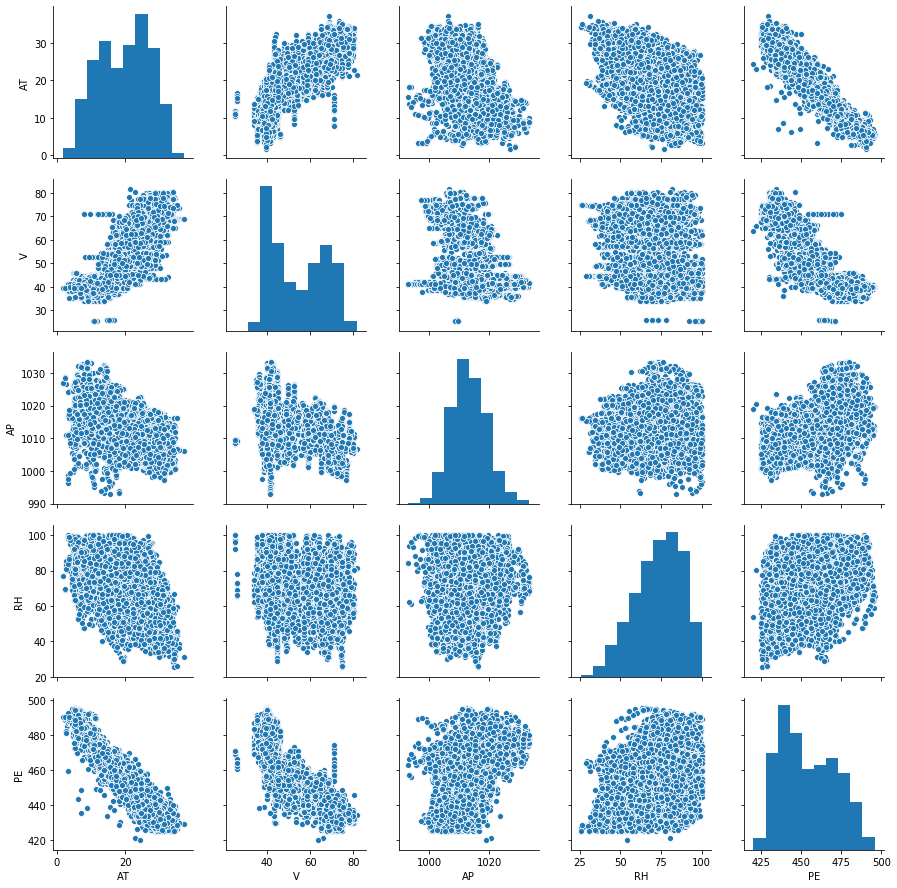

In [54]:
##(b)ii
sns.pairplot(data)
## Some features, like AT and V, have obvious linear relationship with response EP. Other features, AP,RH does not have
## specific linear relationship with response. Moreover, linear relationship exists between features, (like AT verse V)

In [55]:
##b(iii)
stats = data.describe()
range = stats.T['max']-stats.T['min']
stats = stats.append(pd.Series(range,name='range'))
interquartile_range = stats.T['75%']-stats.T['25%']
stats = stats.append(pd.Series(interquartile_range,name='interquartile range'))
print(stats)

                              AT            V           AP           RH  \
count                9568.000000  9568.000000  9568.000000  9568.000000   
mean                   19.651231    54.305804  1013.259078    73.308978   
std                     7.452473    12.707893     5.938784    14.600269   
min                     1.810000    25.360000   992.890000    25.560000   
25%                    13.510000    41.740000  1009.100000    63.327500   
50%                    20.345000    52.080000  1012.940000    74.975000   
75%                    25.720000    66.540000  1017.260000    84.830000   
max                    37.110000    81.560000  1033.300000   100.160000   
range                  35.300000    56.200000    40.410000    74.600000   
interquartile range    12.210000    24.800000     8.160000    21.502500   

                              PE  
count                9568.000000  
mean                  454.365009  
std                    17.066995  
min                   420.260000  

-2.1713199585177945 497.03411989276674 -0.9481284704167596 0.0 0.0074432871256579405


Text(0.5, 1.0, 'linear regression for feature:AT vs response:PE')

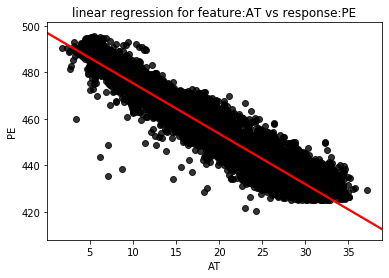

In [56]:
##c
from scipy import stats
##linear regression for feature:AT vs response:PE
x = data['AT']
y = data['PE']
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print(slope, intercept, r_value, p_value, std_err)
a = sns.regplot(x='AT', y='PE', data=data, color='black', line_kws={'color':'red'})
a.set_title('linear regression for feature:AT vs response:PE')
## Since p value is 0.0. AT is significant feature for response. There is inverse linear relationship between AT and PE


In [57]:

Q1 =data['AT'].quantile(0.25)
Q3 = data['AT'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1- 1.5*IQR
upper = Q3+ 1.5*IQR
print(lower)
print(upper)
##Remove outlier where AT smaller than -4.80 or larger than 44.04. In above reg plot, there is no outlier 

-4.804999999999998
44.035


-1.1681351265557118 517.8015263083859 -0.8697803096577877 0.0 0.006775665282736557


Text(0.5, 1.0, 'linear regression for feature:V vs response:PE')

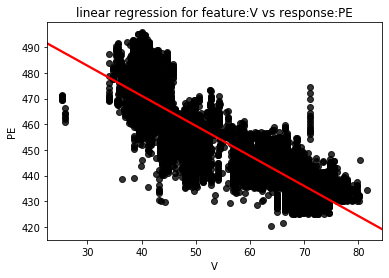

In [58]:
##linear regression for feature:V vs response:PE
x = data['V']
y = data['PE']
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print(slope, intercept, r_value, p_value, std_err)
a = sns.regplot(x='V', y='PE', data=data, color='black', line_kws={'color':'red'})
a.set_title('linear regression for feature:V vs response:PE')
## Since p value is 0.0. V is significant feature for response. There is inverse linear relationship between V and PE


In [59]:
Q1 =data['V'].quantile(0.25)
Q3 = data['V'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1- 1.5*IQR
upper = Q3+ 1.5*IQR
print(lower)
print(upper)
##Remove outlier where V smaller than 4.53 or larger than 103.74. In above reg plot, there is no outlier 

4.539999999999999
103.74000000000001


1.4898716733991129 -1055.2609889844384 0.5184290273615735 0.0 0.025125907932584103


Text(0.5, 1.0, 'linear regression for feature:AP vs response:PE')

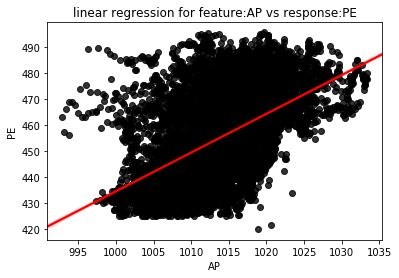

In [60]:
##linear regression for feature:AP vs response:PE
x = data['AP']
y = data['PE']
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print(slope, intercept, r_value, p_value, std_err)
a = sns.regplot(x='AP', y='PE', data=data, color='black', line_kws={'color':'red'})
a.set_title('linear regression for feature:AP vs response:PE')
## Since p value is 0.0. AP is significant feature for response. There is linear relationship between AP and PE. But linearity
## is weak compared with AT and V. In plot, linear trend is not very obvious.


In [61]:
Q1 =data['AP'].quantile(0.25)
Q3 = data['AP'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1- 1.5*IQR
upper = Q3+ 1.5*IQR
print(lower)
print(upper)
##Remove outlier where AP smaller than 996.86 or larger than 1029.5.

996.8600000000001
1029.5


0.45565010226298014 420.96176615548393 0.38979409979010177 0.0 0.011006378807584876


Text(0.5, 1.0, 'linear regression for feature:RH vs response:PE')

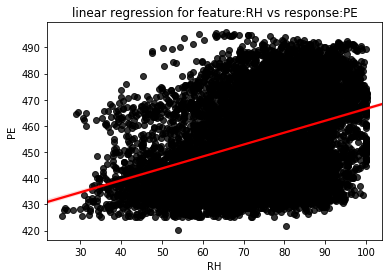

In [62]:
##linear regression for feature:RH vs response:PE
x = data['RH']
y = data['PE']
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print(slope, intercept, r_value, p_value, std_err)
a=sns.regplot(x='RH', y='PE', data=data, color='black', line_kws={'color':'red'})
a.set_title('linear regression for feature:RH vs response:PE')
## Since p value is 0.0. RH is significant feature for response. There is linear relationship between RH and PE but linearity is weak. 


In [63]:
Q1 =data['RH'].quantile(0.25)
Q3 = data['RH'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1- 1.5*IQR
upper = Q3+ 1.5*IQR
print(lower)
print(upper)
##Remove outlier where RH smaller than 31.07 or larger than 117.08.

31.073750000000004
117.08375


In [64]:
##d
import statsmodels.api as sm # import statsmodels
x = data[['AT', 'V', 'AP', 'RH']]
y = data['PE']
x = sm.add_constant(x) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, x).fit() ## sm.OLS(output, input)
predictions = model.predict(x)

# Print out the statistics
model.summary()

## By observing output below, p values for all predictors are 0.0 so for all predictors, we can reject null hypothesis.
## To describe result, AT, V,RH have negative influence on PE and AP has postive influence. R square is high, which is good,
## since higher R-squared values represent smaller differences between the observed data and the fitted values.

C:\Users\Ruich\OneDrive\Pictures\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Fri, 25 Sep 2020   Prob (F-statistic):               0.00
Time:                        15:08:21   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.6093      9.749     46.634      0.000     435.500     473.718
AT            -1.9775      0.015   -129.342      0.000      -2.007      -1.948
V             -0.2339      0.007    -32.122      0.000      -0.248      -0.220
AP             0.0621      0.009      6.564      0.000       0.044       0.081
RH            -0.1581      0.004    -37.918      0.000      -0.166      -0.150
==============================================================================
Omnibus:                      892.002   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4086.777
Skew:                          -0.352   Prob(JB):                         0.00
Kurtosis:                       6.123   Cond. No.                     2.13e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.13e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

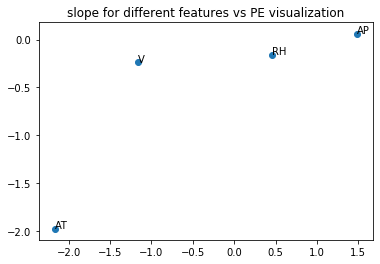

In [65]:
##(e)
##From c, we know that slope for different features vs PE was -2.1713199585177945,-1.1681351265557118,1.4898716733991129
##0.45565010226298014.
regcoef_1c = [-2.1713199585177945,-1.1681351265557118,1.4898716733991129,0.45565010226298014]
regcoef_1d = [-1.9775,-0.2339,0.0621,-0.1581]
feature_name = ['AT','V','AP','RH']
##plt.scatter(regcoef_1c, regcoef_1d)
fig, ax = plt.subplots()
ax.scatter(regcoef_1c, regcoef_1d)
for i, txt in enumerate(feature_name):
    ax.annotate(txt, (regcoef_1c[i], regcoef_1d[i]))
ax.title.set_text('slope for different features vs PE visualization') 
##For this scatter plot, from left to right, the first point is for AT. the second point is for V. the third point
## is for RH. The fourth point is for AP.

In [66]:
##f
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.formula.api as smf
##AT vs PE in non-linear regression
##nonlinear (polynomial) regression for feature:AT vs response:PE
x = data[['AT']]
y = data['PE']
x = PolynomialFeatures(degree=3).fit_transform(x)
x = pd.DataFrame(x, columns = ["AT0", "AT1", "AT2", "AT3"])
model = sm.OLS(y, x).fit() ## sm.OLS(output, input)
predictions = model.predict(x)
model.summary()
##From model.summary(), all features p-values are 0.000. So they are all significant, which means nonlinearity exists

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Fri, 25 Sep 2020   Prob (F-statistic):               0.00
Time:                        15:08:21   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
AT0          492.7281      0.673    732.248      0.000     491.409     494.047
AT1           -0.6103      0.124     -4.941      0.000      -0.852      -0.368
AT2           -0.1251      0.007    -18.199      0.000      -0.139      -0.112
AT3            0.0027      0.000     22.594      0.000       0.002       0.003
==============================================================================
Omnibus:                      648.041   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2767.059
Skew:                          -0.191   Prob(JB):                         0.00
Kurtosis:                       5.607   Cond. No.                     1.90e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.9e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [67]:
##V vs PE in non-linear regression
##nonlinear (polynomial) regression for feature:V vs response:PE
x = data[['V']]
y = data['PE']
x = PolynomialFeatures(degree=3).fit_transform(x)
x = pd.DataFrame(x, columns = ["V0", "V1", "V2", "V3"])
model = sm.OLS(y, x).fit() ## sm.OLS(output, input)
predictions = model.predict(x)
model.summary()
##From model.summary(), V0,V1,V2 p value are much smaller than 0.5. But V2 p value is large, which equals 0.768
##Even though, non-linearity still exists because Y = β0 + β1X + β3X**3 + error in this case.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                 1.098e+04
Date:                Fri, 25 Sep 2020   Prob (F-statistic):               0.00
Time:                        15:08:21   Log-Likelihood:                -33585.
No. Observations:                9568   AIC:                         6.718e+04
Df Residuals:                    9564   BIC:                         6.721e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
V0           554.1468      9.151     60.557      0.000     536.209     572.084
V1            -2.1444      0.509     -4.214      0.000      -3.142      -1.147
V2            -0.0027      0.009     -0.294      0.768      -0.021       0.015
V3             0.0001   5.45e-05      2.465      0.014    2.75e-05       0.000
==============================================================================
Omnibus:                      160.101   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              279.778
Skew:                          -0.125   Prob(JB):                     1.77e-61
Kurtosis:                       3.800   Cond. No.                     2.47e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.47e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [68]:
##AP vs PE in non-linear regression
##nonlinear (polynomial) regression for feature:AP vs response:PE
x = data[['AP']]
y = data['PE']
x = PolynomialFeatures(degree=3).fit_transform(x)
x = pd.DataFrame(x, columns = ["AP0", "AP1", "AP2", "AP3"])
model = sm.OLS(y, x).fit() ## sm.OLS(output, input)
predictions = model.predict(x)
model.summary()
##From model.summary(), all features p-values are 0.000. So they are all significant, which means nonlinearity exists

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     1813.
Date:                Fri, 25 Sep 2020   Prob (F-statistic):               0.00
Time:                        15:08:21   Log-Likelihood:                -39184.
No. Observations:                9568   AIC:                         7.837e+04
Df Residuals:                    9565   BIC:                         7.840e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
AP0            0.0747      0.009      8.415      0.000       0.057       0.092
AP1           25.2556      3.001      8.415      0.000      19.372      31.139
AP2           -0.0500      0.006     -8.439      0.000      -0.062      -0.038
AP3         2.514e-05   2.92e-06      8.613      0.000    1.94e-05    3.09e-05
==============================================================================
Omnibus:                      556.766   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              640.319
Skew:                           0.621   Prob(JB):                    9.05e-140
Kurtosis:                       2.751   Cond. No.                     2.12e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.12e+15. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [69]:
##RH vs PE in non-linear regression
##nonlinear (polynomial) regression for feature:RH vs response:PE
x = data[['RH']]
y = data['PE']
x = PolynomialFeatures(degree=3).fit_transform(x)
x = pd.DataFrame(x, columns = ["RH0", "RH1", "RH2", "RH3"])
model = sm.OLS(y, x).fit() ## sm.OLS(output, input)
predictions = model.predict(x)
model.summary()
##From model.summary(), all features p-values are 0.000. So they are all significant, which means nonlinearity exists
##there is evidence of nonlinear association between any of the predictors and the response

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     579.2
Date:                Fri, 25 Sep 2020   Prob (F-statistic):               0.00
Time:                        15:08:21   Log-Likelihood:                -39923.
No. Observations:                9568   AIC:                         7.985e+04
Df Residuals:                    9564   BIC:                         7.988e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RH0          468.4135     10.545     44.422      0.000     447.744     489.083
RH1           -1.7292      0.486     -3.557      0.000      -2.682      -0.776
RH2            0.0321      0.007      4.433      0.000       0.018       0.046
RH3           -0.0002   3.51e-05     -4.340      0.000      -0.000   -8.34e-05
==============================================================================
Omnibus:                      707.867   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              302.057
Skew:                           0.223   Prob(JB):                     2.56e-66
Kurtosis:                       2.253   Cond. No.                     3.26e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.26e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [70]:
##g
x = data[['AT','V','AP','RH']]
y = data['PE']
x = PolynomialFeatures(interaction_only=True).fit_transform(x)
x = pd.DataFrame(x, columns = ['Coefficient','AT','V','AP','RH','AT*V','AT*AP','AT*RH','V*AP','V*RH','AP*RH'])
model = sm.OLS(y, x).fit() ## sm.OLS(output, input)
predictions = model.predict(x)
model.summary()
##According to model.summary, there is evidence of association of interactions of predictors with the response.
##To be more specific, association of interactions exists between AT*V,AT*RH,V*AP,AP*RH because their p value is smaller than 0.05

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Fri, 25 Sep 2020   Prob (F-statistic):               0.00
Time:                        15:08:21   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Coefficient   685.7825     78.640      8.721      0.000     531.631     839.934
AT             -4.3470      2.373     -1.832      0.067      -8.999       0.305
V              -7.6749      1.351     -5.682      0.000     -10.323      -5.027
AP             -0.1524      0.077     -1.983      0.047      -0.303      -0.002
RH              1.5709      0.773      2.031      0.042       0.055       3.087
AT*V            0.0210      0.001     23.338      0.000       0.019       0.023
AT*AP           0.0018      0.002      0.752      0.452      -0.003       0.006
AT*RH          -0.0052      0.001     -6.444      0.000      -0.007      -0.004
V*AP            0.0068      0.001      5.135      0.000       0.004       0.009
V*RH            0.0008      0.000      1.716      0.086      -0.000       0.002
AP*RH          -0.0016      0.001     -2.125      0.034      -0.003      -0.000
==============================================================================
Omnibus:                     1454.609   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9170.848
Skew:                          -0.574   Prob(JB):                         0.00
Kurtosis:                       7.657   Cond. No.                     1.70e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.7e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [71]:
##h
##Train the regression model on a randomly selected 70% subset of the data with all predictors
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as lm
from sklearn.metrics import mean_squared_error

x_train, x_test, y_train, y_test = train_test_split(data[['AT', 'V', 'AP', 'RH']],data['PE'], test_size=0.3, random_state=123)
model=lm().fit(x_train,y_train)
predictions_train=model.predict(x_train)
predictions_test=model.predict(x_test)
mse_training = mean_squared_error(y_train, predictions_train)
mse_testing = mean_squared_error(y_test, predictions_test)
print(mse_training)
print(mse_testing)
##MSE in training dataset is 19.97
##MSE in testing dataset is 22.66

19.96937644397568
22.658769778031015


In [72]:
## still (h)
x = data[['AT', 'V', 'AP', 'RH']]

polynomial_x = PolynomialFeatures(degree=2, interaction_only=False).fit_transform(x)
polynomial_x = pd.DataFrame(polynomial_x, columns = ['Coff','AT', 'V', 'AP', 'RH', 'AT2', 'AT*V', 'AT*AP', 'AT*RH', 'V2', 'V*AP', 'V*RH', 'AP2', 'AP*RH', 'RH2'])
y = data['PE']
model = sm.OLS(y,polynomial_x ).fit() ## sm.OLS(output, input)
predictions = model.predict(polynomial_x)
model.summary()

##Next, we remove insignificant variables with p value >0.05. We observed that AT*AP,V2,V*AP,V*RH should be removed.


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                 1.030e+04
Date:                Fri, 25 Sep 2020   Prob (F-statistic):               0.00
Time:                        15:08:21   Log-Likelihood:                -27431.
No. Observations:                9568   AIC:                         5.489e+04
Df Residuals:                    9553   BIC:                         5.500e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Coff       -7503.7323   1207.276     -6.215      0.000   -9870.250   -5137.214
AT            -5.7969      3.092     -1.875      0.061     -11.858       0.264
V             -3.0443      1.498     -2.033      0.042      -5.980      -0.109
AP            15.6284      2.341      6.677      0.000      11.040      20.216
RH             3.9194      0.879      4.458      0.000       2.196       5.643
AT2            0.0163      0.003      5.307      0.000       0.010       0.022
AT*V           0.0120      0.003      4.463      0.000       0.007       0.017
AT*AP          0.0031      0.003      1.037      0.300      -0.003       0.009
AT*RH         -0.0061      0.001     -4.056      0.000      -0.009      -0.003
V2            -0.0013      0.001     -1.606      0.108      -0.003       0.000
V*AP           0.0026      0.001      1.765      0.078      -0.000       0.005
V*RH           0.0005      0.001      0.765      0.444      -0.001       0.002
AP2           -0.0076      0.001     -6.706      0.000      -0.010      -0.005
AP*RH         -0.0036      0.001     -4.262      0.000      -0.005      -0.002
RH2           -0.0019      0.000     -7.256      0.000      -0.002      -0.001
==============================================================================
Omnibus:                     1629.849   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11134.924
Skew:                          -0.642   Prob(JB):                         0.00
Kurtosis:                       8.127   Cond. No.                     2.86e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.86e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [73]:
x_train, x_test, y_train, y_test = train_test_split(polynomial_x[['Coff','AT','V','AP','RH','AT2','AT*V', 'AT*RH','V*RH','AP2','AP*RH','RH2']], y, test_size=0.3, random_state=123)
model=lm().fit(x_train,y_train)
predictions_train=model.predict(x_train)
predictions_test=model.predict(x_test)
mse_training = mean_squared_error(y_train, predictions_train)
mse_testing = mean_squared_error(y_test, predictions_test)
print(mse_training)
print(mse_testing)
##Since mse_training and mse_testing both decrease after delete insignificant variable. So, yes, I improve my model
##using possible interaction terms or nonlinear associations between the predictors and response

17.35786961133121
20.01431572098741


16.927570981539542
[4]


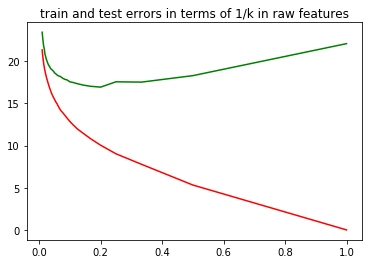

In [74]:
##i
##Perform k-nearest neighbor regression for this dataset using raw features
from sklearn.neighbors import KNeighborsRegressor

test_error_list = []
train_error_list = []
x_train, x_test, y_train, y_test = train_test_split(data[['AT', 'V', 'AP', 'RH']],data['PE'], test_size=0.3, random_state=123)

k = np.arange(1,101,1)
for i in k:    
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(x_train, y_train) 
    pred_train = knn.predict(x_train)
    pred_test = knn.predict(x_test)
    knn_test_error = mean_squared_error(y_test, pred_test)
    knn_train_error = mean_squared_error(y_train, pred_train)
    test_error_list.append(knn_test_error)
    train_error_list.append(knn_train_error)

test_error_list = np.array(test_error_list)
train_error_list = np.array(train_error_list)

lst = np.linspace(1, 100, 100)
nums = []
for i in lst:
    num = 1/int(i)
    nums.append(num)
plt.plot(nums, train_error_list, color='red')
plt.plot(nums, test_error_list, color='green')
plt.title('train and test errors in terms of 1/k in raw features')
##Find the value of k ∈ {1, 2, . . . , 100} that gives you the best fit
print(min(test_error_list))
res = [i for i, j in enumerate(test_error_list) if j == min(test_error_list)]
print(res)
##So optimal k is 4+1 = 5 for raw data.

5.288274817136885
[4]


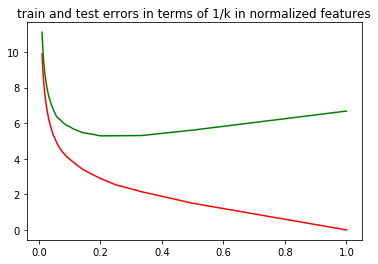

In [75]:
## still i
## Perform k-nearest neighbor regression for this dataset using normalized features
from sklearn import preprocessing
normalized_data = preprocessing.normalize(data)
normalized_data = pd.DataFrame(data=normalized_data[0:,0:], columns=['AT', 'V', 'AP', 'RH', 'PE'])
test_error_list = []
train_error_list = []
x_train, x_test, y_train, y_test = train_test_split(normalized_data[['AT', 'V', 'AP', 'RH']],data['PE'], test_size=0.3, random_state=123)
k = np.arange(1,101,1)
for i in k:    
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(x_train, y_train) 
    pred_train = knn.predict(x_train)
    pred_test = knn.predict(x_test)
    knn_test_error = mean_squared_error(y_test, pred_test)
    knn_train_error = mean_squared_error(y_train, pred_train)
    test_error_list.append(knn_test_error)
    train_error_list.append(knn_train_error)

test_error_list = np.array(test_error_list)
train_error_list = np.array(train_error_list)

lst = np.linspace(1, 100, 100)
nums = []
for i in lst:
    num = 1/int(i)
    nums.append(num)
plt.plot(nums, train_error_list, color='red')
plt.plot(nums, test_error_list, color='green')
plt.title('train and test errors in terms of 1/k in normalized features')
res = [i for i, j in enumerate(test_error_list) if j == min(test_error_list)]
print(min(test_error_list))
print(res)
##So optimal k is 4+1 = 5 for normalized data.

In [76]:
##j
##For Knn, smallest test error for raw features is 16.93, for normalized data is 5.288274817136885. For Linear Regression, smallest test error is 20.68.
##So we can conclude that KNN is better model.

In [77]:
##ISLR 2.4.1
##(a):Flexible method is better since for large sample size, the variance is smaller. Moreover, flexible method can satisfy
##    smaller number predictors to fit more data points closely.
##(b):Inflexible method is better since flexible method will cause overfitting in smaller sample size
##(c):Flexible method is better since flexible method is useful in finding non-linear effect
##(d):Inflexible method is better since flexible method will catch too much noises due to large variance in error terms


In [78]:
##ISLR 2.4.7
##By using euclidean distance formula:sqrt((q1-p1)^2 + (q2-p2)^2+....+(qn-pn)^2), we can calculate Euclidean distance between each observation and
##the test point.
##(a): for obs1, distance = sqrt(9)=3
## for obs2, distance = sqrt(4)=2
## for obs3, distance = sqrt(1+9)= 3.27
## for obs4, distance = sqrt(1+4)=2.23
## for obs5, distance = sqrt(1+1)=1.41
## for obs6, distance = sqrt(1+1+1)=1.73

##(b): prediction is green since distance from obs5 to test point is shortest among these six observations, so only obs5 is included.
## and color of obs5 is green
##(c): if k=3, obs2,5,6 are included. Since obs2 and obs6 are red and only obs5 is green, P(Y=Red|X=x0) =2/3
## and P(Y=Green|X=x0) =1/3. So prediction is red
##(d): Smaller; Since smaller k is better to capture decision boundary